In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
df=pd.read_csv("DS4.txt")

In [5]:
df.head()

,RECORD_CREATION_DATE,LOAN_AMOUNT,CREDIT_RANGE,EXISTING_DEBT,AGENT_NOTES,OFFICE_LOCATION,DEFAULTED
0,01May2014:09:24:27.000000,2500,760-779,"$10,001-$20,000",NaN,NORTHERN CALIFORNIA,False
1,01May2014:09:48:36.000000,2500,700-719,"$1-$10,000","Annual gross income: $25,400",SOUTHERN CALIFORNIA,False
2,01May2014:10:10:36.000000,6300,740-759,"$100,000+",NaN,ARIZONA,True
3,01May2014:10:31:25.000000,4300,780-799,"$1-$10,000","Annual gross income: $191,900",SOUTHERN CALIFORNIA,False
4,01May2014:10:46:54.000000,20100,780-799,"$90,001-$100,000","Verified monthly debt payments: $1,700",SOUTHERN CALIFORNIA,True


In [6]:
df.shape

(8000, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   RECORD_CREATION_DATE  8000 non-null   object
 1   LOAN_AMOUNT           8000 non-null   int64 
 2   CREDIT_RANGE          8000 non-null   object
 3   EXISTING_DEBT         5963 non-null   object
 4   AGENT_NOTES           5064 non-null   object
 5   OFFICE_LOCATION       8000 non-null   object
 6   DEFAULTED             8000 non-null   bool  
dtypes: bool(1), int64(1), object(5)
memory usage: 382.9+ KB


In [8]:
df.isnull().sum()

RECORD_CREATION_DATE       0
LOAN_AMOUNT                0
CREDIT_RANGE               0
EXISTING_DEBT           2037
AGENT_NOTES             2936
OFFICE_LOCATION            0
DEFAULTED                  0
dtype: int64

In [9]:
df['time']=df['RECORD_CREATION_DATE'].str.split(':',n=1,expand=True)[0]

In [51]:
df.head()

,RECORD_CREATION_DATE,LOAN_AMOUNT,CREDIT_RANGE,EXISTING_DEBT,AGENT_NOTES,OFFICE_LOCATION,DEFAULTED,time
0,01May2014:09:24:27.000000,2500,760-779,"$10,001-$20,000",NaN,NC,False,2014-05-01
1,01May2014:09:48:36.000000,2500,700-719,"$1-$10,000","Annual gross income: $25,400",SC,False,2014-05-01
2,01May2014:10:10:36.000000,6300,740-759,"$100,000+",NaN,AZ,True,2014-05-01
3,01May2014:10:31:25.000000,4300,780-799,"$1-$10,000","Annual gross income: $191,900",SC,False,2014-05-01
4,01May2014:10:46:54.000000,20100,780-799,"$90,001-$100,000","Verified monthly debt payments: $1,700",SC,True,2014-05-01


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   RECORD_CREATION_DATE  8000 non-null   object
 1   LOAN_AMOUNT           8000 non-null   int64 
 2   CREDIT_RANGE          8000 non-null   object
 3   EXISTING_DEBT         5963 non-null   object
 4   AGENT_NOTES           5064 non-null   object
 5   OFFICE_LOCATION       8000 non-null   object
 6   DEFAULTED             8000 non-null   bool  
 7   time                  8000 non-null   object
dtypes: bool(1), int64(1), object(6)
memory usage: 445.4+ KB


In [12]:
df['time']=pd.to_datetime(df['time'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   RECORD_CREATION_DATE  8000 non-null   object        
 1   LOAN_AMOUNT           8000 non-null   int64         
 2   CREDIT_RANGE          8000 non-null   object        
 3   EXISTING_DEBT         5963 non-null   object        
 4   AGENT_NOTES           5064 non-null   object        
 5   OFFICE_LOCATION       8000 non-null   object        
 6   DEFAULTED             8000 non-null   bool          
 7   time                  8000 non-null   datetime64[ns]
dtypes: bool(1), datetime64[ns](1), int64(1), object(5)
memory usage: 445.4+ KB


In [37]:
df['OFFICE_LOCATION']=df['OFFICE_LOCATION'].replace({'NORTHERN CALIFORNIA':"NC",'SOUTHERN CALIFORNIA':"SC",'NEVADA':"NV",'ARIZONA':"AZ",'WASHINGTON STATE':"WA",'OREGON':"OR"})

<Figure size 576x144 with 0 Axes>

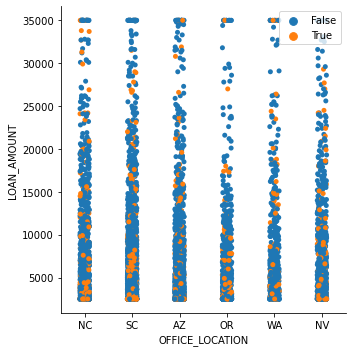

In [41]:
plt.figure(figsize=(8,2))
sns.catplot(data=df,x="OFFICE_LOCATION",y="LOAN_AMOUNT",hue='DEFAULTED',legend=False)
plt.legend()
plt.tight_layout()

In [42]:
df['CREDIT_RANGE'].value_counts()

700-719    2081
740-759    1708
780-799    1393
760-779    1233
720-739    1015
800+        570
Name: CREDIT_RANGE, dtype: int64

In [67]:
df['LOAN_AMOUNT'].value_counts()

2500     2729
35000     118
2600      117
2900      115
3100      113
         ... 
30700       1
22500       1
26100       1
34300       1
20200       1
Name: LOAN_AMOUNT, Length: 307, dtype: int64

S:\Software\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 58.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
S:\Software\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 68.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
S:\Software\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 63.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
S:\Software\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 60.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
S:\Software\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 52.7% of the points cannot be placed; you may want to decrease the size of the marke

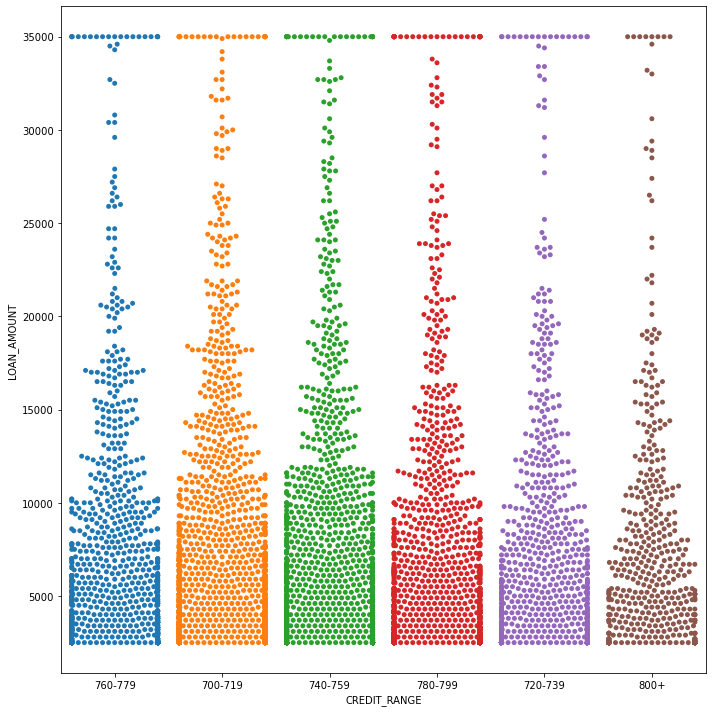

In [70]:
plt.figure(figsize=(10,10))
sns.swarmplot(data=df, x='CREDIT_RANGE',y='LOAN_AMOUNT')
plt.tight_layout()

<AxesSubplot:>

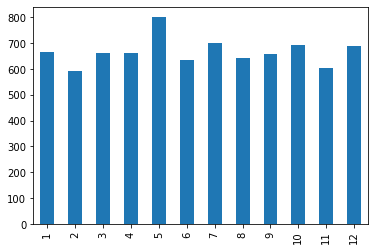

In [55]:
df['time'].dt.month.value_counts().sort_index().plot(kind='bar')

In [88]:
df['EXISTING_DEBT'].replace({'$100,000+':"Above 100K"},inplace=True)

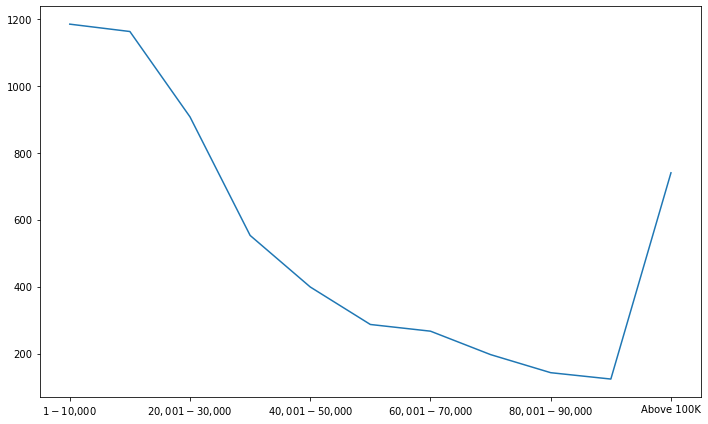

In [92]:
plt.figure(figsize=(10,6))
df['EXISTING_DEBT'].value_counts().sort_index().plot(kind='line')
plt.tight_layout()